<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/Lab3_2348561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data=pd.read_csv('/content/Market_Basket_Optimisation.csv',header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


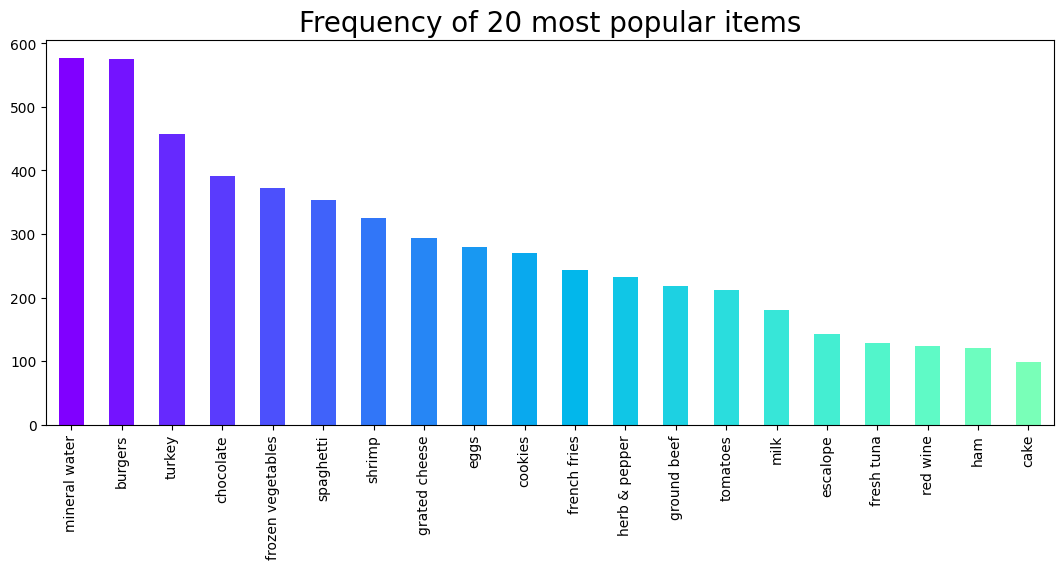

In [ ]:
color=plt.cm.rainbow(np.linspace(0,1,40))
data[0].value_counts().head(20).plot.bar(color=color,figsize=(13,5))
plt.title("Frequency of 20 most popular items",fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.shape

(7501, 20)

In [ ]:
data.info

<bound method DataFrame.info of                  0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs               NaN   
2           chutney                NaN          NaN               NaN   
3            turkey            avocado          NaN               NaN   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread               NaN   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                NaN          NaN               NaN   
7499       escalope          green tea          NaN               NaN   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green gra

In [ ]:
transposed_data = data.transpose()
print(transposed_data)

                 0          1        2        3                 4     \
0              shrimp    burgers  chutney   turkey     mineral water   
1             almonds  meatballs      NaN  avocado              milk   
2             avocado       eggs      NaN      NaN        energy bar   
3      vegetables mix        NaN      NaN      NaN  whole wheat rice   
4        green grapes        NaN      NaN      NaN         green tea   
5    whole weat flour        NaN      NaN      NaN               NaN   
6                yams        NaN      NaN      NaN               NaN   
7      cottage cheese        NaN      NaN      NaN               NaN   
8        energy drink        NaN      NaN      NaN               NaN   
9        tomato juice        NaN      NaN      NaN               NaN   
10     low fat yogurt        NaN      NaN      NaN               NaN   
11          green tea        NaN      NaN      NaN               NaN   
12              honey        NaN      NaN      NaN              

In [ ]:
transposed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
0,shrimp,burgers,chutney,turkey,mineral water,low fat yogurt,whole wheat pasta,soup,frozen vegetables,french fries,...,herb & pepper,chocolate,burgers,turkey,pancakes,butter,burgers,chicken,escalope,eggs
1,almonds,meatballs,NaN,avocado,milk,NaN,french fries,light cream,spaghetti,NaN,...,NaN,escalope,salmon,burgers,light mayo,light mayo,frozen vegetables,NaN,green tea,frozen smoothie
2,avocado,eggs,NaN,NaN,energy bar,NaN,NaN,shallot,green tea,NaN,...,NaN,NaN,pancakes,dessert wine,NaN,fresh bread,eggs,NaN,NaN,yogurt cake
3,vegetables mix,NaN,NaN,NaN,whole wheat rice,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,french fries,shrimp,NaN,NaN,french fries,NaN,NaN,low fat yogurt
4,green grapes,NaN,NaN,NaN,green tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,frozen smoothie,pasta,NaN,NaN,magazines,NaN,NaN,NaN


In [ ]:
transactions=[]
for index,row in data.iterrows():
  transactions.append(row.dropna().tolist())

In [ ]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [ ]:
encoded=pd.get_dummies(pd.DataFrame(transactions)).sum(level=0)
encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0_almonds,0_antioxydant juice,0_asparagus,0_avocado,0_babies food,0_bacon,0_barbecue sauce,0_black tea,0_blueberries,0_body spray,...,16_antioxydant juice,16_french fries,16_frozen smoothie,17_frozen smoothie,17_protein bar,17_spinach,18_cereals,18_mayonnaise,18_spinach,19_olive oil
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
transactiondf=(encoded>0).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemset = apriori(transactiondf,min_support=0.01,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.076790,(0_burgers)
1,0.013065,(0_cake)
2,0.052126,(0_chocolate)
3,0.035995,(0_cookies)
4,0.037195,(0_eggs)
...,...,...
84,0.010265,"(1_frozen vegetables, 0_shrimp)"
85,0.013332,"(1_mineral water, 0_spaghetti)"
86,0.011865,"(2_spaghetti, 1_ground beef)"
87,0.017731,"(1_spaghetti, 2_mineral water)"


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1_frozen vegetables),(0_shrimp),0.031196,0.043328,0.010265,0.329060,7.594701,0.008914,1.425868,0.896290
1,(0_shrimp),(1_frozen vegetables),0.043328,0.031196,0.010265,0.236923,7.594701,0.008914,1.269602,0.907656
2,(1_mineral water),(0_spaghetti),0.064525,0.047194,0.013332,0.206612,4.377947,0.010286,1.200933,0.824803
3,(0_spaghetti),(1_mineral water),0.047194,0.064525,0.013332,0.282486,4.377947,0.010286,1.303773,0.809800
4,(2_spaghetti),(1_ground beef),0.037195,0.038795,0.011865,0.318996,8.222653,0.010422,1.411454,0.912318
5,(1_ground beef),(2_spaghetti),0.038795,0.037195,0.011865,0.305842,8.222653,0.010422,1.387011,0.913837
6,(1_spaghetti),(2_mineral water),0.054793,0.049993,0.017731,0.323601,6.472882,0.014992,1.404506,0.894523
7,(2_mineral water),(1_spaghetti),0.049993,0.054793,0.017731,0.354667,6.472882,0.014992,1.464681,0.890004
8,(2_spaghetti),(3_mineral water),0.037195,0.026796,0.012798,0.344086,12.840743,0.011802,1.483737,0.957746
9,(3_mineral water),(2_spaghetti),0.026796,0.037195,0.012798,0.477612,12.840743,0.011802,1.843084,0.947513


In [ ]:
rules[(rules['confidence']>0.2) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1_frozen vegetables),(0_shrimp),0.031196,0.043328,0.010265,0.329060,7.594701,0.008914,1.425868,0.896290
1,(0_shrimp),(1_frozen vegetables),0.043328,0.031196,0.010265,0.236923,7.594701,0.008914,1.269602,0.907656
2,(1_mineral water),(0_spaghetti),0.064525,0.047194,0.013332,0.206612,4.377947,0.010286,1.200933,0.824803
3,(0_spaghetti),(1_mineral water),0.047194,0.064525,0.013332,0.282486,4.377947,0.010286,1.303773,0.809800
4,(2_spaghetti),(1_ground beef),0.037195,0.038795,0.011865,0.318996,8.222653,0.010422,1.411454,0.912318
5,(1_ground beef),(2_spaghetti),0.038795,0.037195,0.011865,0.305842,8.222653,0.010422,1.387011,0.913837
6,(1_spaghetti),(2_mineral water),0.054793,0.049993,0.017731,0.323601,6.472882,0.014992,1.404506,0.894523
7,(2_mineral water),(1_spaghetti),0.049993,0.054793,0.017731,0.354667,6.472882,0.014992,1.464681,0.890004
8,(2_spaghetti),(3_mineral water),0.037195,0.026796,0.012798,0.344086,12.840743,0.011802,1.483737,0.957746
9,(3_mineral water),(2_spaghetti),0.026796,0.037195,0.012798,0.477612,12.840743,0.011802,1.843084,0.947513


In [ ]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
             antecedents            consequents  confidence       lift
9      (3_mineral water)          (2_spaghetti)    0.477612  12.840743
7      (2_mineral water)          (1_spaghetti)    0.354667   6.472882
8          (2_spaghetti)      (3_mineral water)    0.344086  12.840743
0  (1_frozen vegetables)             (0_shrimp)    0.329060   7.594701
6          (1_spaghetti)      (2_mineral water)    0.323601   6.472882
4          (2_spaghetti)        (1_ground beef)    0.318996   8.222653
5        (1_ground beef)          (2_spaghetti)    0.305842   8.222653
3          (0_spaghetti)      (1_mineral water)    0.282486   4.377947
1             (0_shrimp)  (1_frozen vegetables)    0.236923   7.594701
2      (1_mineral water)          (0_spaghetti)    0.206612   4.377947


In [ ]:
transactiondf['antecedents','consequents'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

KeyError: ignored